<a href="https://colab.research.google.com/github/alanfmorato/Analise-de-vendas/blob/main/Series_Temporais_Vendas_Alucar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [40]:
alucar = pd.read_csv('/content/alucar.csv')

In [41]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [42]:
#Verificando a quantidade de linhas e colunas

alucar.shape

(24, 2)

In [43]:
#Verificando a quantidade de dados nulos na tabela

alucar.isna().sum().sum()

0

In [44]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [45]:
#Alterando o tipo da coluna mes para datetime

alucar.mes = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

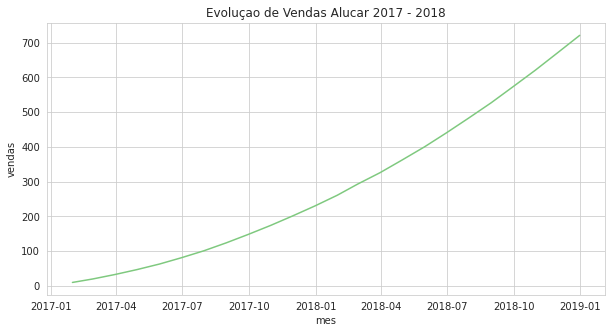

In [54]:
#Evoluçao das vendas ao longo dos meses
plt.figure(figsize = (10,5))
plt.title('Evoluçao de Vendas Alucar 2017 - 2018')
sns.set_palette('Accent')
sns.set_style('whitegrid')
sns.lineplot(data = alucar, x = 'mes', y = 'vendas');

In [51]:
#Criando uma coluna de aumento de venda de acordo com o mes anterior

alucar['aumento'] = alucar['vendas'].diff()

In [52]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


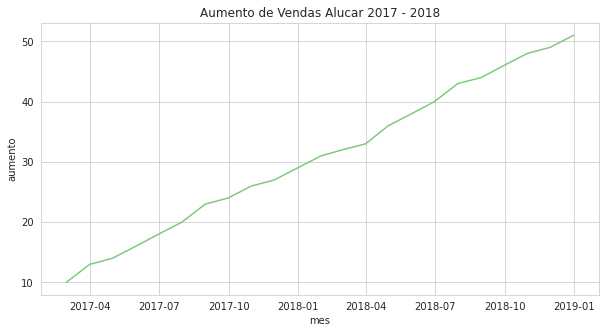

In [55]:
#Aumento das vendas ao longo dos meses

plt.figure(figsize = (10,5))
plt.title('Aumento de Vendas Alucar 2017 - 2018')
sns.set_palette('Accent')
sns.set_style('whitegrid')
sns.lineplot(data = alucar, x = 'mes', y = 'aumento');

In [56]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


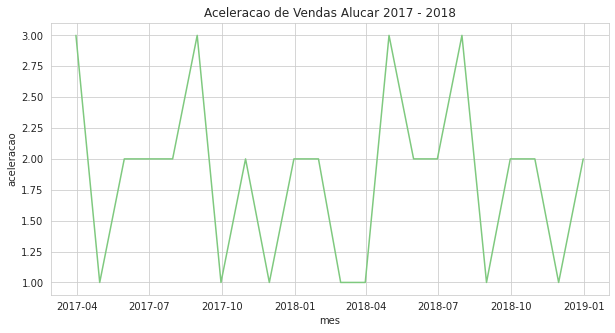

In [57]:
plt.figure(figsize = (10,5))
plt.title('Aceleracao de Vendas Alucar 2017 - 2018')
sns.set_palette('Accent')
sns.set_style('whitegrid')
sns.lineplot(data = alucar, x = 'mes', y = 'aceleracao');

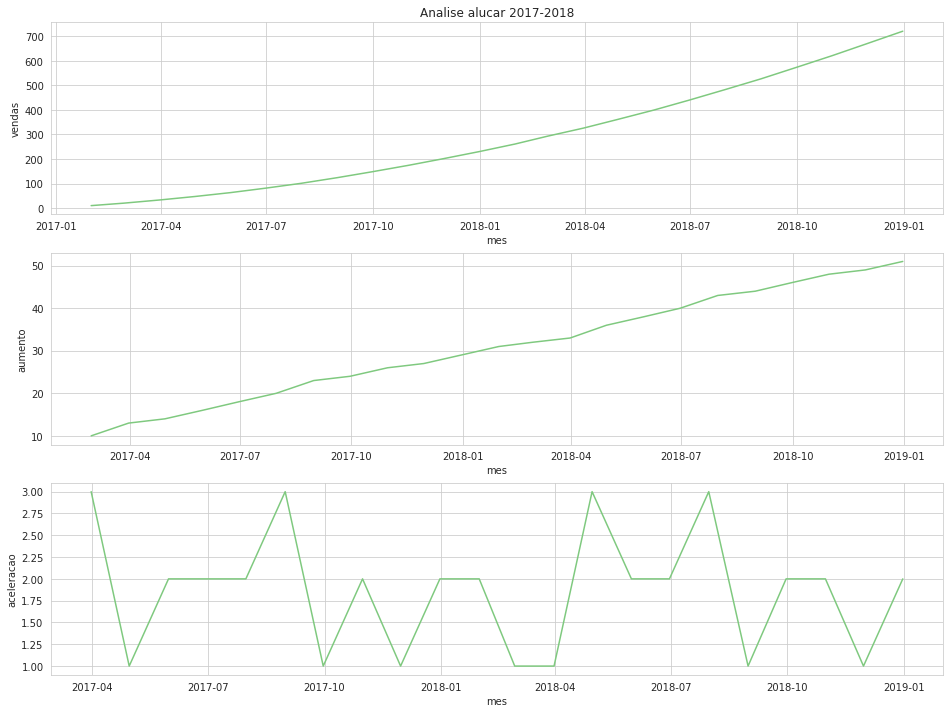

In [61]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise alucar 2017-2018')
sns.lineplot(data = alucar, x = 'mes', y = 'vendas');
plt.subplot(3,1,2)
sns.lineplot(data = alucar, x = 'mes', y = 'aumento');
plt.subplot(3,1,3)
sns.lineplot(data = alucar, x = 'mes', y = 'aceleracao');
ax = ax

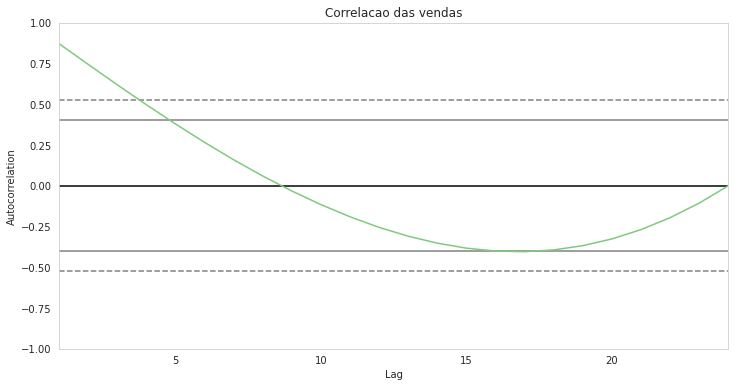

In [69]:
plt.figure(figsize = (12,6))
plt.title("Correlacao das vendas")
autocorrelation_plot(alucar.vendas);

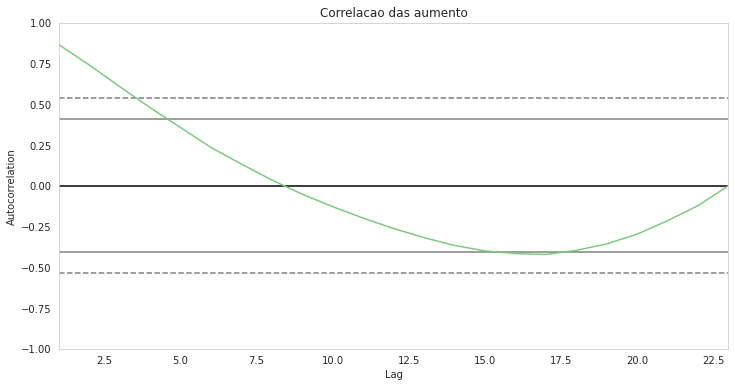

In [74]:
plt.figure(figsize = (12,6))
plt.title("Correlacao das aumento")
autocorrelation_plot(alucar['aumento'][1:]);

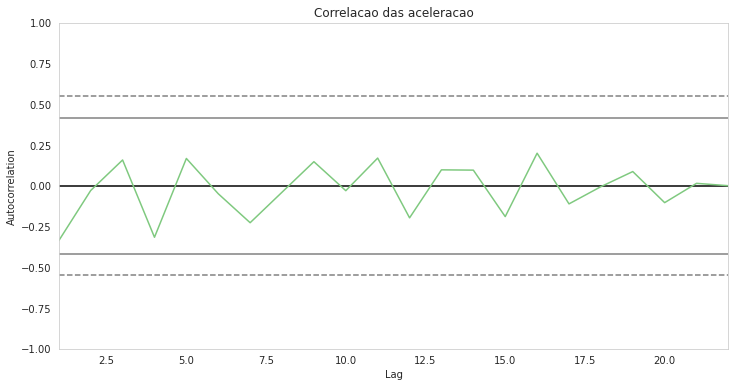

In [75]:
plt.figure(figsize = (12,6))
plt.title("Correlacao das aceleracao")
autocorrelation_plot(alucar['aceleracao'][2:]);

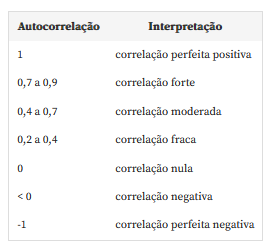